# **Bigmart sales Prediction for Train Data** #

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
sns.set_style('darkgrid')
matplotlib.rcParams['figure.figsize']=(10,10)
matplotlib.rcParams['font.size']=15

# **Loading Datasets** #

In [2]:
mart = pd.read_csv('../input/mini-project/Train.csv')



mart.head(10)



,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


# **Exploring Datasates** #

In [3]:
mart.shape

(8523, 12)

In [4]:
mart.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

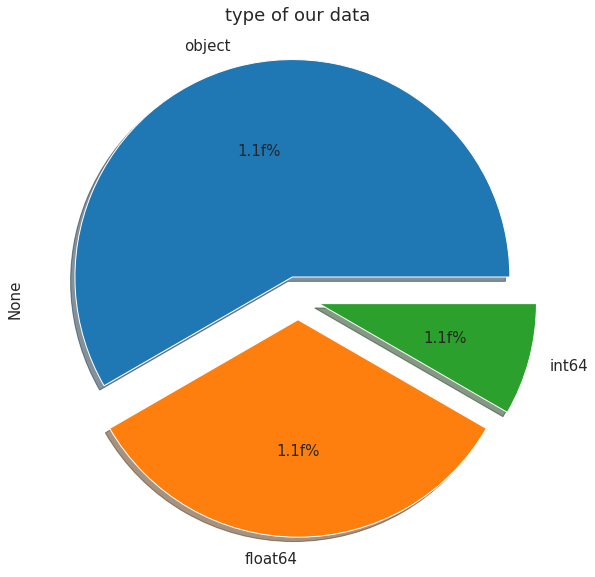

In [5]:
mart.dtypes.value_counts().plot.pie(explode=[0.1, 0.1, 0.1],autopct='1.1f%%',shadow=True)
plt.title('type of our data');

In [6]:
mart.describe(include='all')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523,7060.000000,8523,8523.000000,8523,8523.000000,8523,8523.000000,6113,8523,8523,8523.000000
unique,1559,NaN,5,NaN,16,NaN,10,NaN,3,3,4,NaN
top,FDW13,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1,NaN
freq,10,NaN,5089,NaN,1232,NaN,935,NaN,2793,3350,5577,NaN
mean,NaN,12.857645,NaN,0.066132,NaN,140.992782,NaN,1997.831867,NaN,NaN,NaN,2181.288914
std,NaN,4.643456,NaN,0.051598,NaN,62.275067,NaN,8.371760,NaN,NaN,NaN,1706.499616
min,NaN,4.555000,NaN,0.000000,NaN,31.290000,NaN,1985.000000,NaN,NaN,NaN,33.290000
25%,NaN,8.773750,NaN,0.026989,NaN,93.826500,NaN,1987.000000,NaN,NaN,NaN,834.247400
50%,NaN,12.600000,NaN,0.053931,NaN,143.012800,NaN,1999.000000,NaN,NaN,NaN,1794.331000
75%,NaN,16.850000,NaN,0.094585,NaN,185.643700,NaN,2004.000000,NaN,NaN,NaN,3101.296400


# **Data Cleaning** #

In [7]:
mart.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
mart.isnull().sum()/len(mart)*100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

so we had : 17% of Item_Weight + 28 % of Outlet_Size missing value

**1) Item Weight Missing Value**

In [9]:
mart.Item_Weight.describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

In [10]:
mart.Item_Weight.fillna(mart.Item_Weight.mean(),inplace=True)

**2)Outlet_Size Missing Value**

In [11]:
mart.Outlet_Size.value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [12]:
mart.Outlet_Size.fillna('Medium',inplace=True)

In [13]:
mart.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

# **5. Data Visualization** #

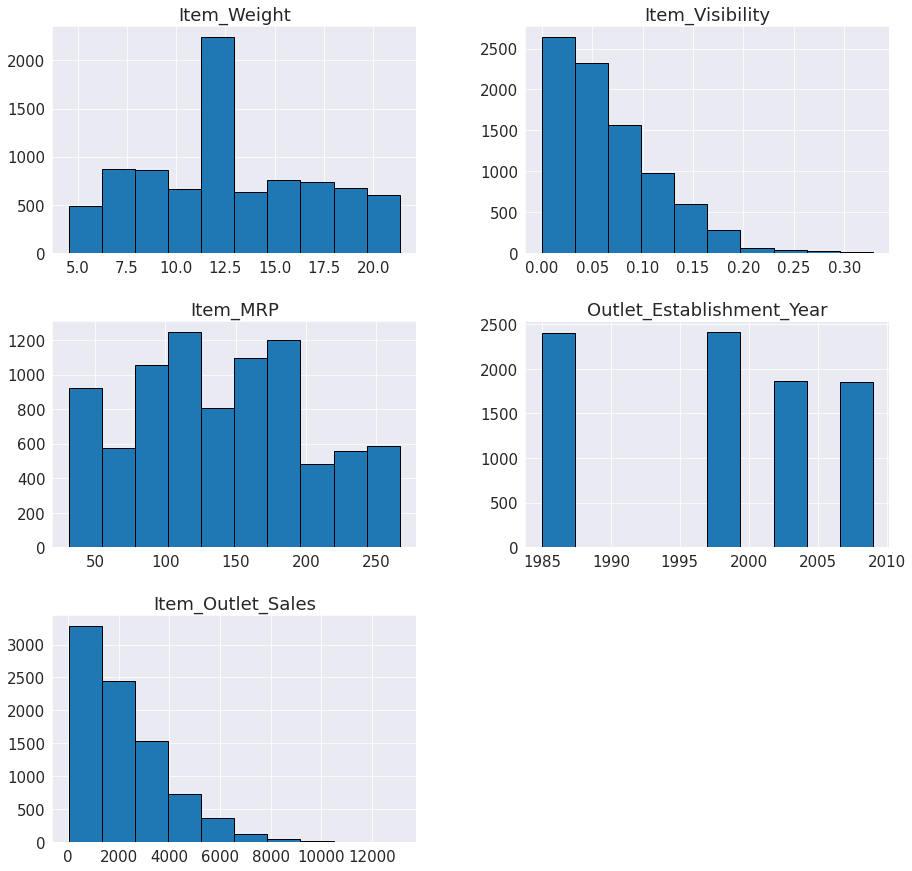

In [14]:
mart.hist(figsize=(15,15),edgecolor='black');

**A) Type : Numerical**

1) Item Weight

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

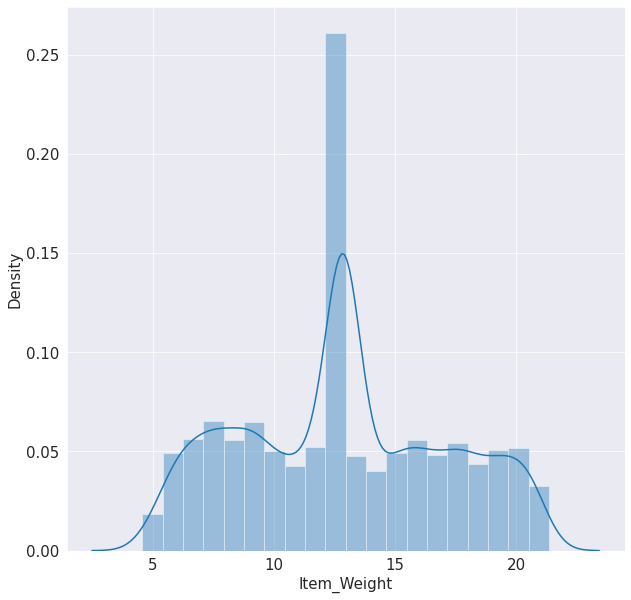

In [15]:
sns.distplot(mart.Item_Weight,kde=True,bins=20)

2) Item Visibility

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

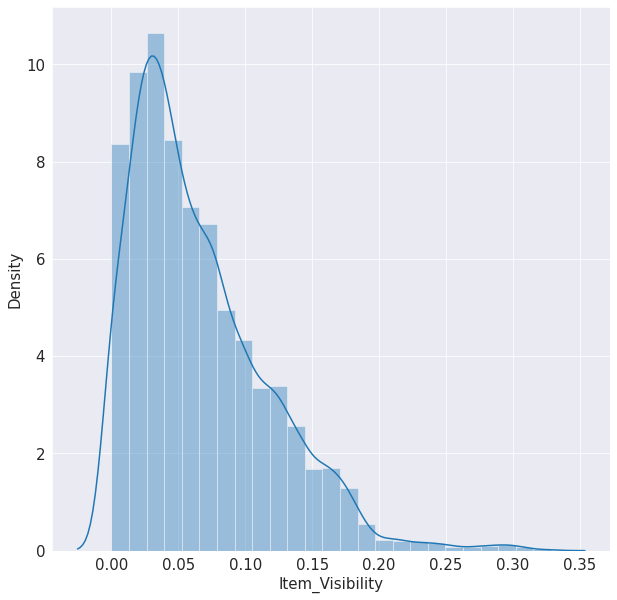

In [16]:
sns.distplot(mart.Item_Visibility,kde=True,bins=25)

3) Item_MRP

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

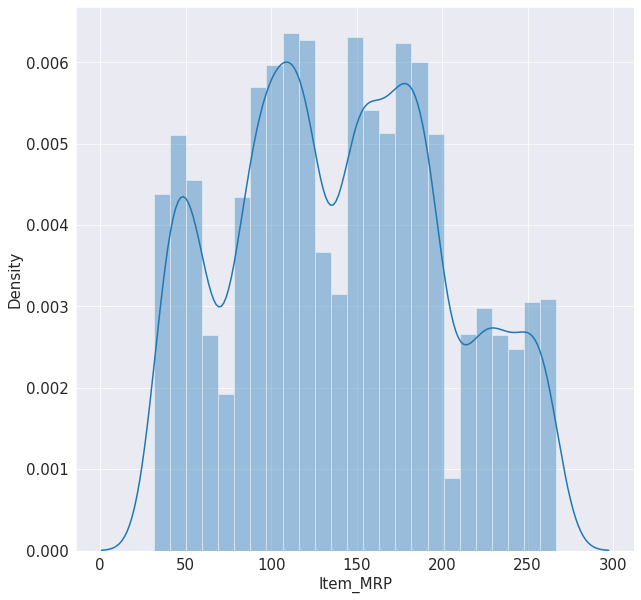

In [17]:
sns.distplot(mart.Item_MRP,kde=True,bins=25)

4) Outlet Establisment Year

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

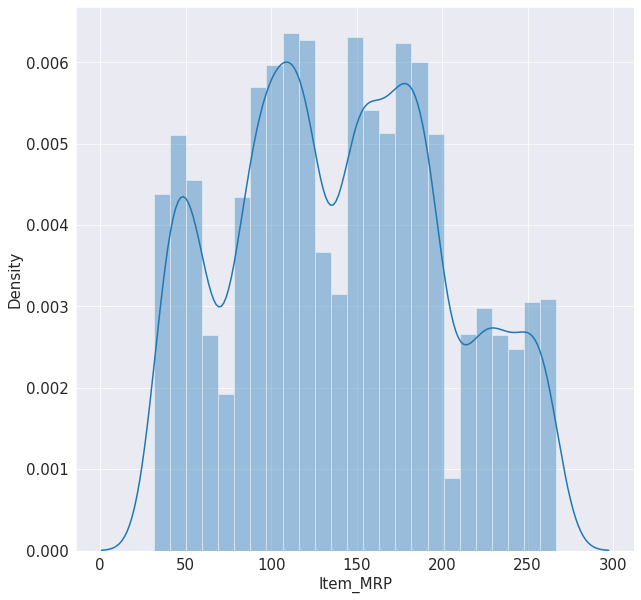

In [18]:
sns.distplot(mart.Item_MRP,kde=True,bins=25)

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='count'>

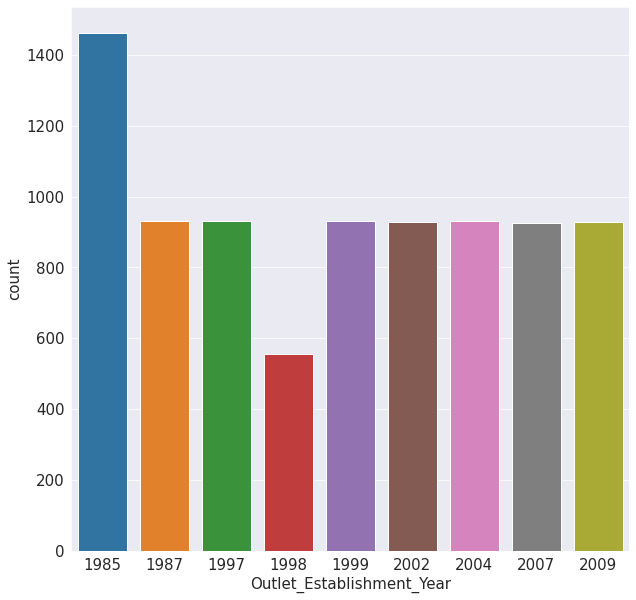

In [19]:
sns.countplot(x='Outlet_Establishment_Year',data=mart,)

<AxesSubplot:ylabel='Outlet_Establishment_Year'>

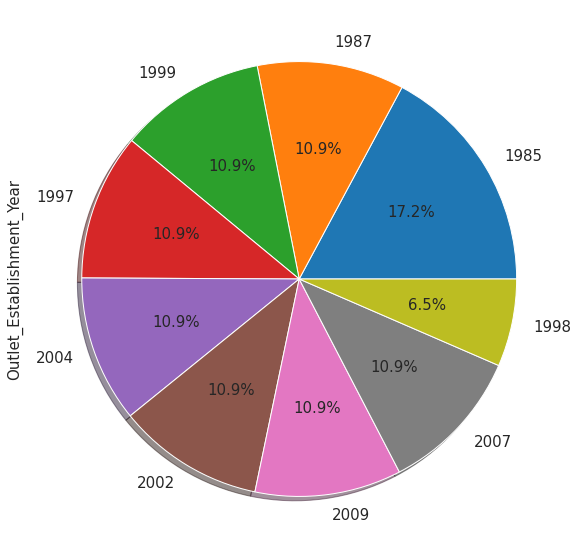

In [20]:
mart.Outlet_Establishment_Year.value_counts().plot.pie(autopct='%1.1f%%',shadow=True)


5) Item_Outlet_Sales(Target)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

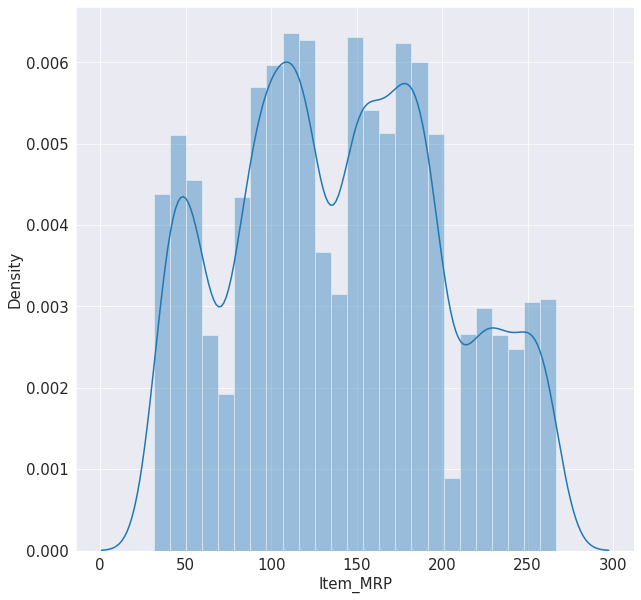

In [21]:
sns.distplot(mart.Item_MRP,kde=True,bins=25)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


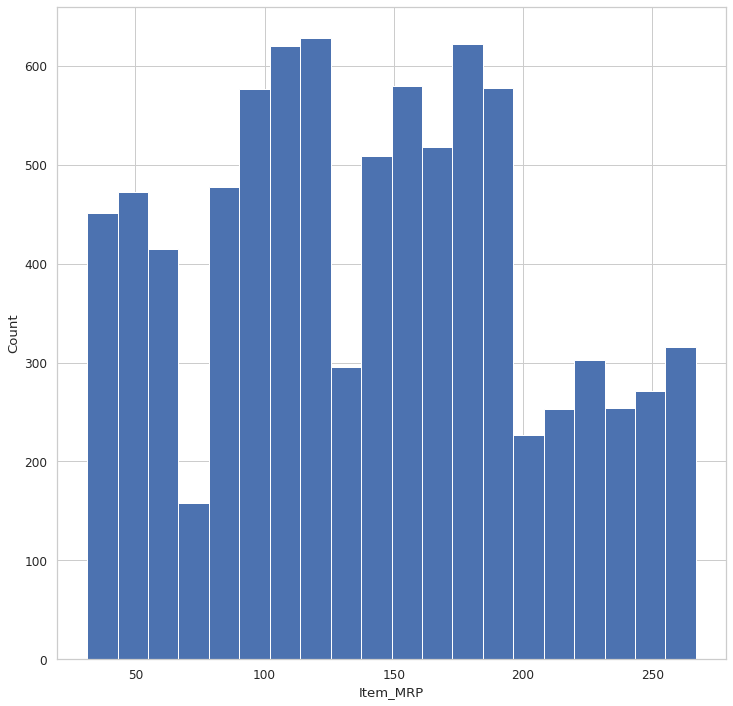

In [22]:
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [12, 12]})
sns.distplot(
    mart['Item_MRP'], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}
).set(xlabel='Item_MRP', ylabel='Count');

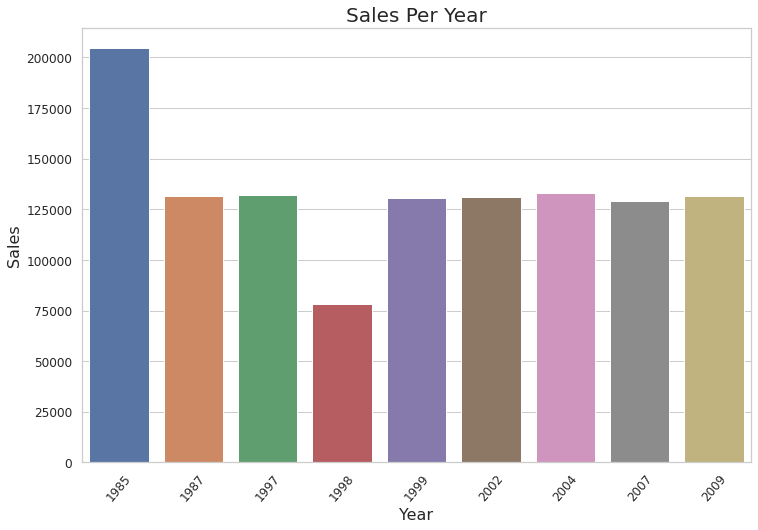

In [23]:
y = mart.groupby(['Outlet_Establishment_Year']).sum()
y = y['Item_MRP']
x = y.index.astype(int)

plt.figure(figsize=(12,8))
ax = sns.barplot(y = y, x = x)
ax.set_xlabel(xlabel='Year', fontsize=16)
ax.set_xticklabels(labels = x, fontsize=12, rotation=50)
ax.set_ylabel(ylabel='Sales', fontsize=16)
ax.set_title(label='Sales Per Year', fontsize=20)
plt.show();

B) Type: Object

1)Item_Fat_Content

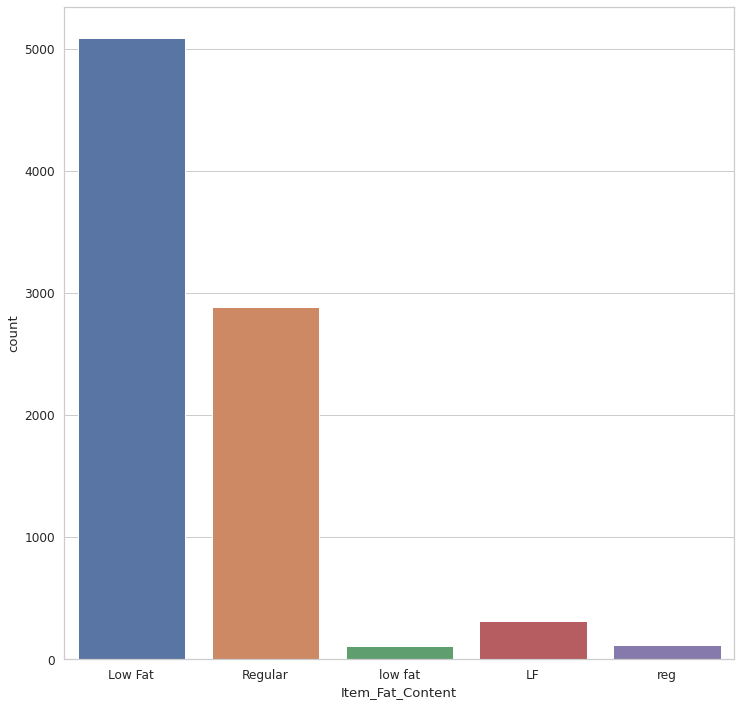

In [24]:
sns.countplot(x='Item_Fat_Content',data=mart);

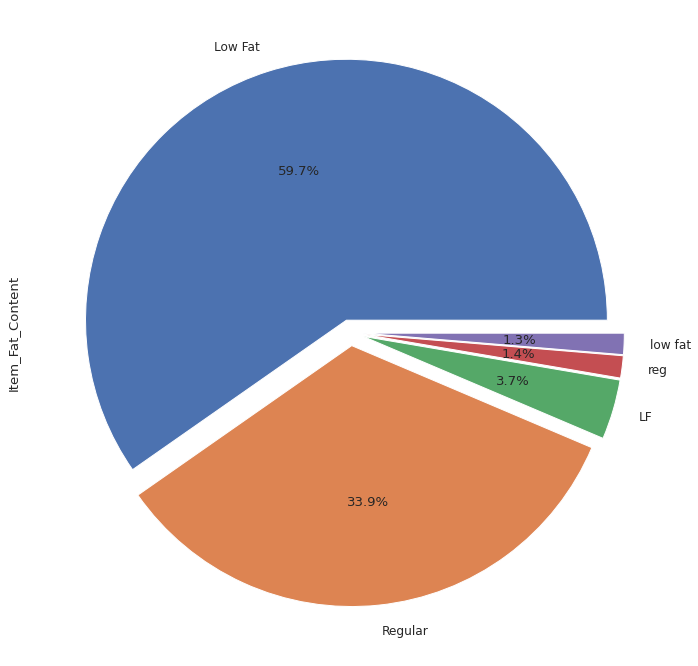

In [25]:
mart.Item_Fat_Content.value_counts().plot.pie(explode=[0.05,0.05,0.05,0.05,0.05],autopct='%1.1f%%',shadow=False);

2) Item Type

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


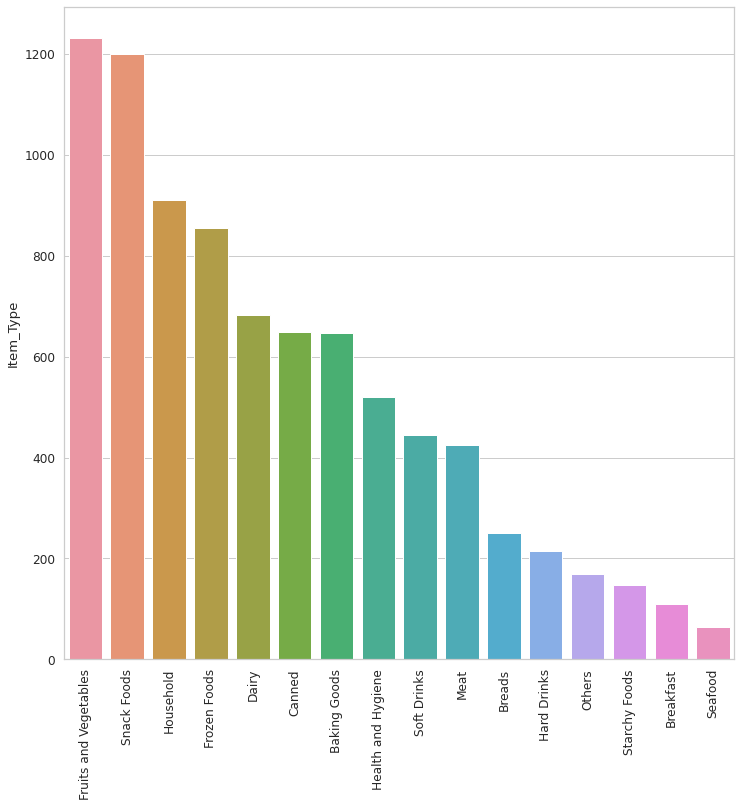

<Figure size 1080x1080 with 0 Axes>

In [26]:
Item_Type1=mart.Item_Type.value_counts().head(20)
sns.barplot(Item_Type1.index,Item_Type1)
plt.xticks(rotation=90)
plt.figure(figsize=(15,15));

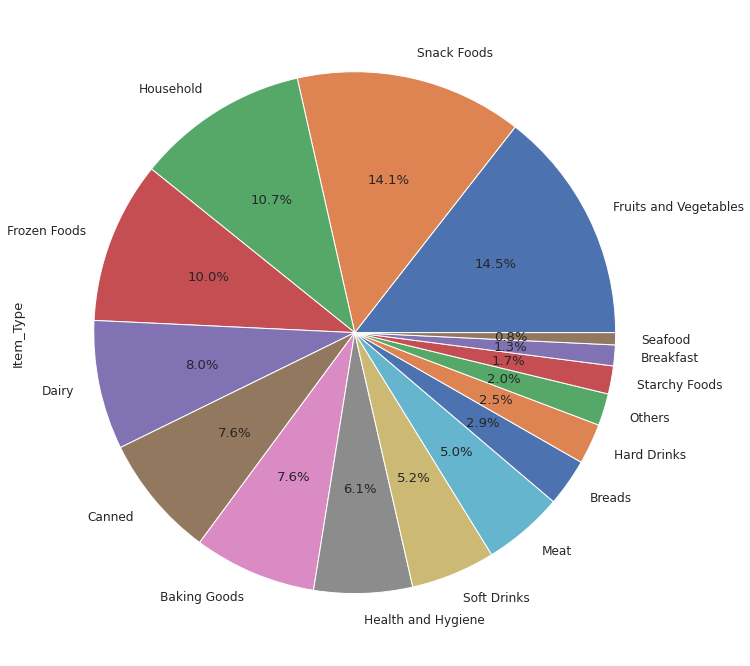

In [27]:
mart.Item_Type.value_counts().plot.pie(autopct='%1.1f%%',shadow=False);

3) Outlet Size

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


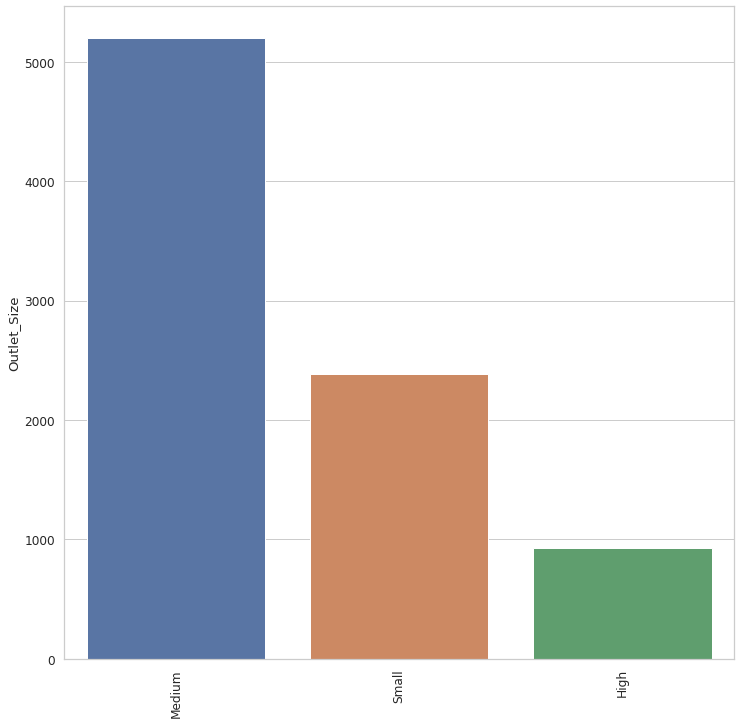

<Figure size 1080x1080 with 0 Axes>

In [28]:
Outlet_Size1=mart.Outlet_Size.value_counts().head(3)
sns.barplot(Outlet_Size1.index,Outlet_Size1)
plt.xticks(rotation=90)
plt.figure(figsize=(15,15));

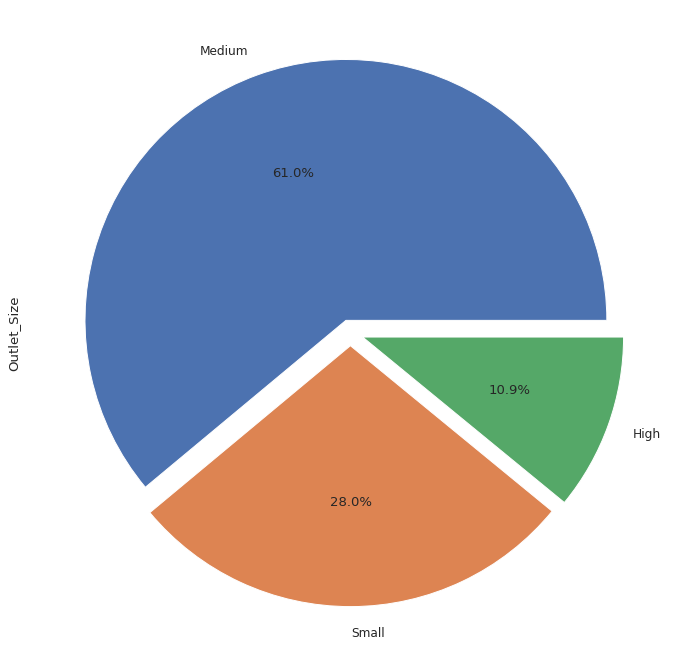

In [29]:
mart.Outlet_Size.value_counts().plot.pie(explode=[0.05,0.05,0.05],autopct='%1.1f%%',shadow=False);

4)Outlet Location Type

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


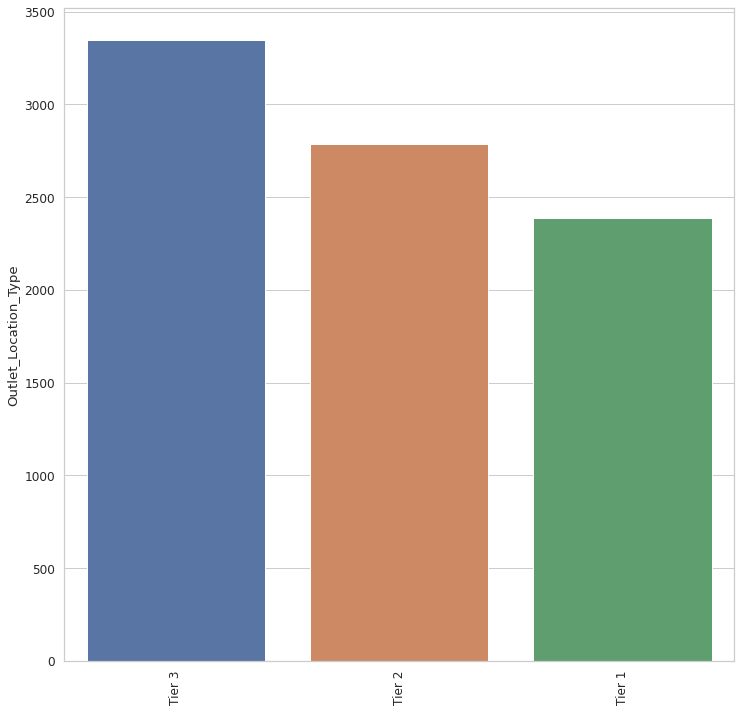

<Figure size 1080x1080 with 0 Axes>

In [30]:
Outlet_Location_Type1=mart.Outlet_Location_Type.value_counts().head(3)
sns.barplot(Outlet_Location_Type1.index,Outlet_Location_Type1)
plt.xticks(rotation=90)
plt.figure(figsize=(15,15));

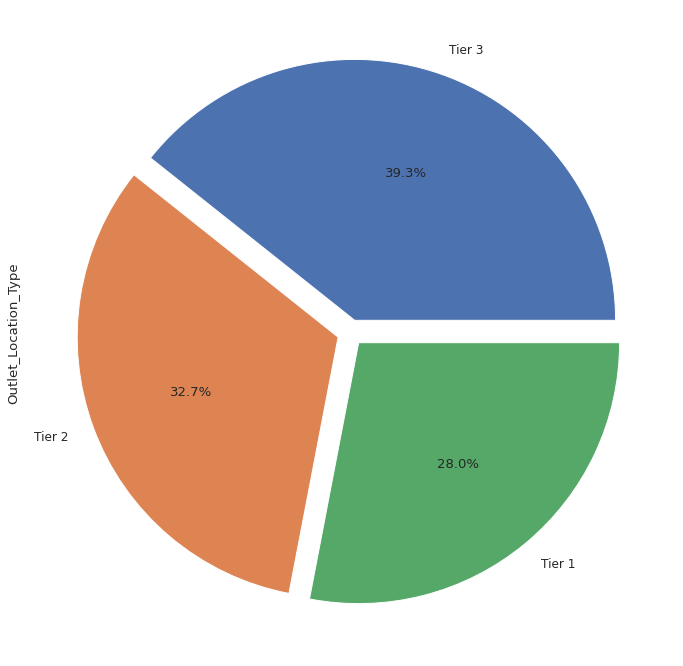

In [31]:
mart.Outlet_Location_Type.value_counts().plot.pie(explode=[0.05,0.05,0.05],autopct='%1.1f%%',shadow=False);

5)Outlet Type

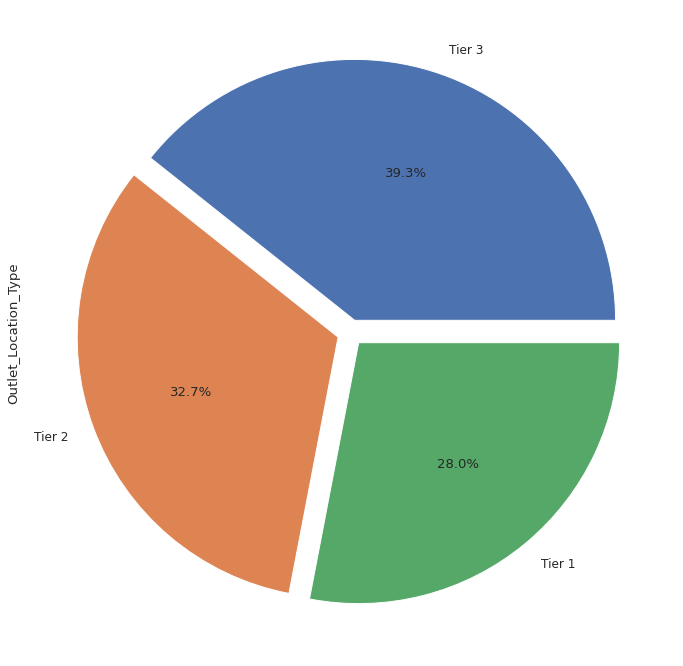

In [32]:
mart.Outlet_Location_Type.value_counts().plot.pie(explode=[0.05,0.05,0.05],autopct='%1.1f%%',shadow=False);

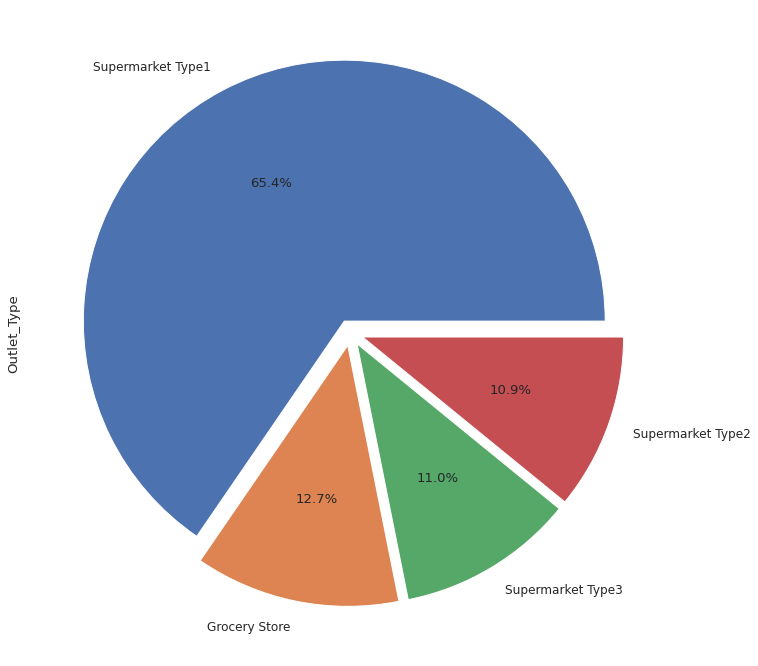

In [33]:
mart.Outlet_Type.value_counts().plot.pie(explode=[0.05,0.05,0.05,0.05],autopct='%1.1f%%',shadow=False);

# **Features Selection** #

columns that we want todelete

Item_Identifier : Unique product ID ==> delete

Outlet_Identifier : Unique store ID ==> delete

In [34]:
mart=mart.drop('Item_Identifier',axis=1)
mart=mart.drop('Outlet_Identifier',axis=1)
mart

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.920,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.500,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.930,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,8.380,Regular,0.046982,Baking Goods,108.1570,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,7.210,Regular,0.145221,Snack Foods,103.1332,2009,Medium,Tier 3,Supermarket Type2,1845.5976


# **7) Transform data from categorical to numerical** #

In [35]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

Item_Fat_content

In [36]:
mart.Item_Fat_Content.value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

0 ==> LF

1 ==> Low Fat

2 ==> Regular

3 ==> low fat

4 ==> reg

Outlet_Size

In [37]:
mart.Outlet_Size.value_counts()


Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

Item Size

In [38]:
mart.Item_Type.value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [39]:
mart.Item_Type=le.fit_transform(mart.Item_Type)

In [40]:
mart.Item_Type.value_counts()

6     1232
13    1200
9      910
5      856
4      682
3      649
0      648
8      520
14     445
10     425
1      251
7      214
11     169
15     148
2      110
12      64
Name: Item_Type, dtype: int64